In [1]:
# Importing warning filter and libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style = 'white', palette = 'colorblind')

from kmodes.kmodes import KModes

# Data Preparation

In [2]:
# Reading the dataset "Bird Strikes"

df = pd.read_excel('Bird Strikes.xlsx')
pd.set_option('display.max_columns', None)

In [3]:
# Obtaining information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                25558 non-null  int64         
 1   Aircraft: Type                           25558 non-null  object        
 2   Airport: Name                            25558 non-null  object        
 3   Altitude bin                             25558 non-null  object        
 4   Aircraft: Make/Model                     25558 non-null  object        
 5   Wildlife: Number struck                  25558 non-null  object        
 6   Wildlife: Number Struck Actual           25558 non-null  int64         
 7   Effect: Impact to flight                 25558 non-null  object        
 8   FlightDate                               25558 non-null  datetime64[ns]
 9   Effect: Indicated Damage               

In [4]:
# Observing a sample of the dataset

df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,2,US AIRWAYS*,New York,Climb,None,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,2,AMERICAN AIRLINES,Texas,Landing Roll,None,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14,No damage,2,BUSINESS,Louisiana,Approach,None,False,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,2,ALASKA AIRLINES,Washington,Climb,None,True,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,2003-06-23,No damage,2,COMAIR AIRLINES,Virginia,Approach,None,False,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [5]:
# Obtaining the statistical summary for the numerical features

df.describe()

,Record ID,Wildlife: Number Struck Actual,Cost: Total $,Feet above ground,Number of people injured
count,25558.000000,25558.000000,2.555800e+04,25558.000000,25558.000000
mean,253916.085609,2.691525,5.567354e+03,797.916778,0.001056
std,38510.453382,12.793975,1.219713e+05,1736.341046,0.050420
min,1195.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,225783.750000,1.000000,0.000000e+00,0.000000,0.000000
50%,248749.000000,1.000000,0.000000e+00,50.000000,0.000000
75%,269168.750000,1.000000,0.000000e+00,700.000000,0.000000
max,321909.000000,942.000000,1.239775e+07,18000.000000,6.000000


In [6]:
# Obtaining the statistical summary for the categorical features

df.describe(include = 'object').T

,count,unique,top,freq
Aircraft: Type,25558,2,Airplane,25429
Airport: Name,25558,1160,DALLAS/FORT WORTH INTL ARPT,803
Altitude bin,25558,2,< 1000 ft,20666
Aircraft: Make/Model,25558,351,B-737-700,2488
Wildlife: Number struck,25558,4,1,20915
Effect: Impact to flight,25558,5,None,23431
Effect: Indicated Damage,25558,2,No damage,23081
Aircraft: Number of engines?,25291,5,2,23025
Aircraft: Airline/Operator,25558,293,SOUTHWEST AIRLINES,4628
Origin State,25109,60,California,2520


In [7]:
# Checking for duplicates

df.duplicated().sum()
print('There are a total of ' + (str(df.duplicated().sum()) + ' duplicates in the dataset.'))

There are a total of 0 duplicates in the dataset.


In [8]:
# Checking if there are any missing values

df.isna().values.any()

True

In [9]:
# Checking the total of missing values

df.isna().sum().sum()

5487

In [10]:
# Checking the total of missing values per column

df.isna().sum()

Record ID                                     0
Aircraft: Type                                0
Airport: Name                                 0
Altitude bin                                  0
Aircraft: Make/Model                          0
Wildlife: Number struck                       0
Wildlife: Number Struck Actual                0
Effect: Impact to flight                      0
FlightDate                                    0
Effect: Indicated Damage                      0
Aircraft: Number of engines?                267
Aircraft: Airline/Operator                    0
Origin State                                449
When: Phase of flight                         0
Conditions: Precipitation                     0
Remains of wildlife collected?                0
Remains of wildlife sent to Smithsonian       0
Remarks                                    4771
Wildlife: Size                                0
Conditions: Sky                               0
Wildlife: Species                       

In [11]:
# Creating a categorical version of the dataset for modelling with K-Modes

df_km = df.copy()

In [12]:
# Checking unique values for 'Altitude bin'

df_km['Altitude bin'].unique()

array(['> 1000 ft', '< 1000 ft'], dtype=object)

In [13]:
# Converting the column 'Altitude bin' in categorical dtype

df_km.rename(columns = {'Altitude bin': 'Is altitude bin > 1000 ft?'}, inplace = True)
df_km['Is altitude bin > 1000 ft?'] = df_km['Is altitude bin > 1000 ft?'].map({'> 1000 ft': 'Yes', '< 1000 ft': 'No'})

In [14]:
# Creating a new column 'Month' from the column 'FlightDate'

df_km['Month'] = df_km['FlightDate'].dt.month

In [15]:
# Converting the column 'Month' to object

df_km['Month'] = df_km['Month'].map({1: 'January',
                                     2: 'February',
                                     3: 'March',
                                     4: 'April',
                                     5: 'May',
                                     6: 'June',
                                     7: 'July',
                                     8: 'August',
                                     9: 'September',
                                     10: 'October',
                                     11: 'November',
                                     12: 'December'})

In [16]:
# Checking the unique values per feature

df_km.nunique()

Record ID                                  25558
Aircraft: Type                                 2
Airport: Name                               1160
Is altitude bin > 1000 ft?                     2
Aircraft: Make/Model                         351
Wildlife: Number struck                        4
Wildlife: Number Struck Actual               106
Effect: Impact to flight                       5
FlightDate                                  4227
Effect: Indicated Damage                       2
Aircraft: Number of engines?                   5
Aircraft: Airline/Operator                   293
Origin State                                  60
When: Phase of flight                          7
Conditions: Precipitation                      8
Remains of wildlife collected?                 2
Remains of wildlife sent to Smithsonian        2
Remarks                                    18186
Wildlife: Size                                 3
Conditions: Sky                                3
Wildlife: Species   

In [17]:
# Dropping the variables that will not be used for modelling

df_km.drop(['Record ID',
            'Airport: Name',
            'Aircraft: Make/Model',
            'Wildlife: Number Struck Actual',
            'FlightDate',
            'Aircraft: Number of engines?',
            'Aircraft: Airline/Operator',
            'Remains of wildlife collected?',
            'Remains of wildlife sent to Smithsonian',
            'Remarks',
            'Wildlife: Species',
            'Feet above ground'], axis = 1, inplace = True)
df_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Aircraft: Type                      25558 non-null  object
 1   Is altitude bin > 1000 ft?          25558 non-null  object
 2   Wildlife: Number struck             25558 non-null  object
 3   Effect: Impact to flight            25558 non-null  object
 4   Effect: Indicated Damage            25558 non-null  object
 5   Origin State                        25109 non-null  object
 6   When: Phase of flight               25558 non-null  object
 7   Conditions: Precipitation           25558 non-null  object
 8   Wildlife: Size                      25558 non-null  object
 9   Conditions: Sky                     25558 non-null  object
 10  Pilot warned of birds or wildlife?  25558 non-null  object
 11  Cost: Total $                       25558 non-null  in

In [18]:
# Filling missing values with 'Unknown'

df_km = df_km.fillna('Unknown')
df_km.isna().sum().sum()

0

In [19]:
# Checking the total of unique values for 'Cost: Total $'

df_km['Cost: Total $'].nunique()

803

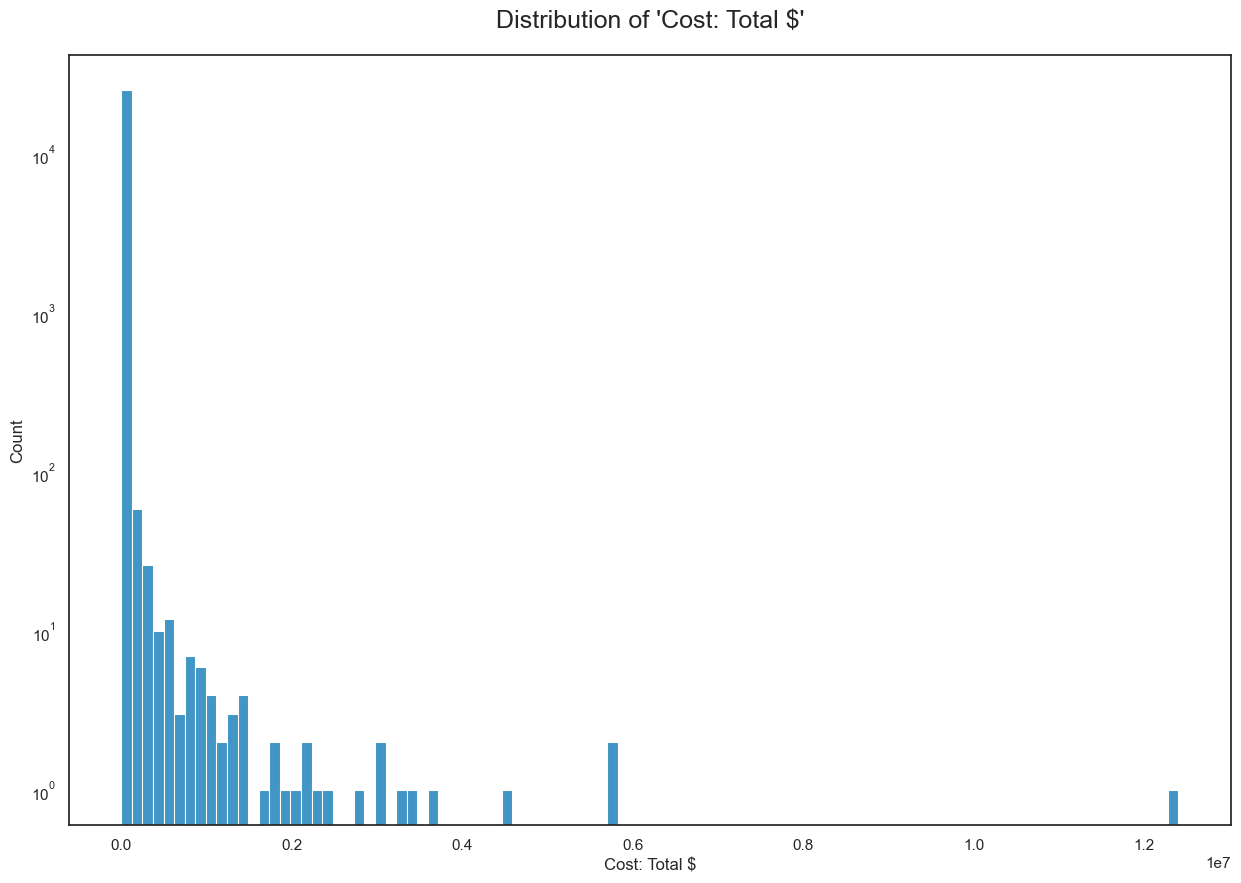

In [20]:
# Checking the distribution of 'Cost: Total $'

fig = plt.gcf()
fig.set_size_inches(15, 10)

sns.histplot(df_km['Cost: Total $'], bins = 100)
plt.yscale('log')

plt.title("Distribution of 'Cost: Total $'", fontsize = 18, pad = 20)
plt.xlabel('Cost: Total $', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

In [21]:
# Observing the lowest value counts for 'Cost: Total $'

df_km.sort_values(by = 'Cost: Total $').head(1)

,Aircraft: Type,Is altitude bin > 1000 ft?,Wildlife: Number struck,Effect: Impact to flight,Effect: Indicated Damage,Origin State,When: Phase of flight,Conditions: Precipitation,Wildlife: Size,Conditions: Sky,Pilot warned of birds or wildlife?,Cost: Total $,Number of people injured,Is Aircraft Large?,Month
12778,Airplane,No,1,None,No damage,Oregon,Approach,None,Small,Some Cloud,N,0,0,No,June


In [22]:
# Observing the highest value counts for 'Cost: Total $'

df_km.sort_values(by = 'Cost: Total $').tail(1)

,Aircraft: Type,Is altitude bin > 1000 ft?,Wildlife: Number struck,Effect: Impact to flight,Effect: Indicated Damage,Origin State,When: Phase of flight,Conditions: Precipitation,Wildlife: Size,Conditions: Sky,Pilot warned of birds or wildlife?,Cost: Total $,Number of people injured,Is Aircraft Large?,Month
233,Airplane,No,2 to 10,Other,Caused damage,Alabama,Landing Roll,None,Large,No Cloud,N,12397751,2,No,January


In [23]:
# Converting the column 'Cost: Total $' to categorical bins

df_km['Cost: Total $'] = pd.cut(x = df_km['Cost: Total $'],
                                bins = [0, 1, 1000, 10000, 100000, 1000000, 10000000, 100000000],
                                labels = ['No cost', '1 to 999', '1000 to 9999', '10000 to 99999', '100000 to 999999',
                                          '1000000 to 1999999', '10000000 to 19999999'],
                                include_lowest = True, right = False)

df_km.head()

,Aircraft: Type,Is altitude bin > 1000 ft?,Wildlife: Number struck,Effect: Impact to flight,Effect: Indicated Damage,Origin State,When: Phase of flight,Conditions: Precipitation,Wildlife: Size,Conditions: Sky,Pilot warned of birds or wildlife?,Cost: Total $,Number of people injured,Is Aircraft Large?,Month
0,Airplane,Yes,Over 100,Engine Shut Down,Caused damage,New York,Climb,None,Medium,No Cloud,N,10000 to 99999,0,Yes,November
1,Airplane,No,Over 100,None,Caused damage,Texas,Landing Roll,None,Small,Some Cloud,Y,No cost,0,No,July
2,Airplane,No,Over 100,None,No damage,Louisiana,Approach,None,Small,No Cloud,N,No cost,0,No,September
3,Airplane,No,Over 100,Precautionary Landing,No damage,Washington,Climb,None,Small,Some Cloud,Y,No cost,0,Yes,September
4,Airplane,No,Over 100,None,No damage,Virginia,Approach,None,Small,No Cloud,N,No cost,0,No,June


In [24]:
# Observing the value counts for the column 'Cost: Total $' in categorical bins 

df_km['Cost: Total $'].value_counts()

No cost                 24330
1 to 999                  391
10000 to 99999            364
1000 to 9999              286
100000 to 999999          155
1000000 to 1999999         31
10000000 to 19999999        1
Name: Cost: Total $, dtype: int64

In [25]:
# Checking the total of unique values for 'Number of people injured'

df_km['Number of people injured'].nunique()

4

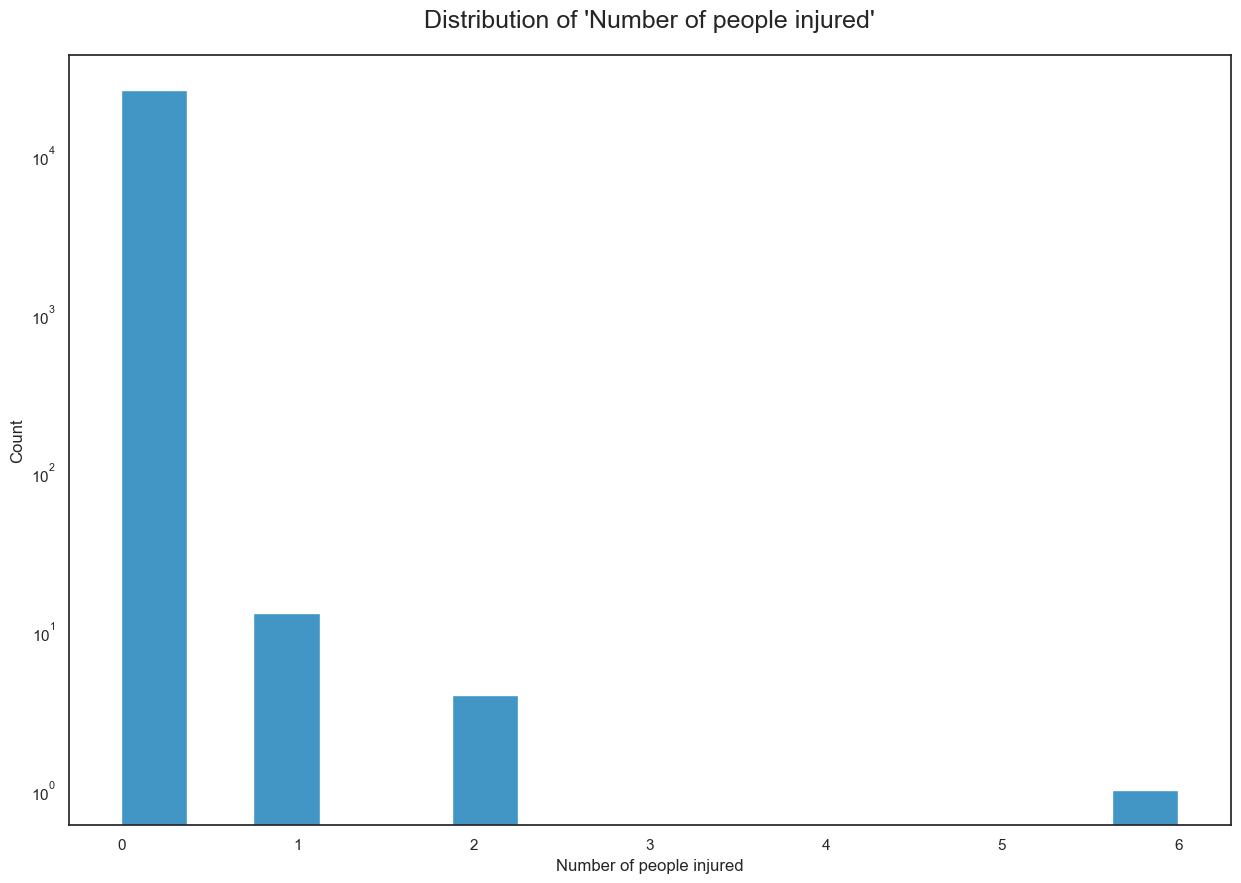

In [26]:
# Checking the distribution of 'Number of people injured'

fig = plt.gcf()
fig.set_size_inches(15, 10)

sns.histplot(df_km['Number of people injured'])
plt.yscale('log')

plt.title("Distribution of 'Number of people injured'", fontsize = 18, pad = 20)
plt.xlabel('Number of people injured', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

In [27]:
# Observing the value counts for 'Number of people injured'

df_km['Number of people injured'].value_counts()

0    25540
1       13
2        4
6        1
Name: Number of people injured, dtype: int64

In [28]:
# Converting the column 'Number of people injured' to categorical bins

df_km.rename(columns = {'Number of people injured': 'Were people injured?'}, inplace = True)

df_km['Were people injured?'] = pd.cut(x = df_km['Were people injured?'], bins = [0, 1, 10],
                                labels = ['No', 'Yes'], include_lowest = True, right = False)

df_km.head()

,Aircraft: Type,Is altitude bin > 1000 ft?,Wildlife: Number struck,Effect: Impact to flight,Effect: Indicated Damage,Origin State,When: Phase of flight,Conditions: Precipitation,Wildlife: Size,Conditions: Sky,Pilot warned of birds or wildlife?,Cost: Total $,Were people injured?,Is Aircraft Large?,Month
0,Airplane,Yes,Over 100,Engine Shut Down,Caused damage,New York,Climb,None,Medium,No Cloud,N,10000 to 99999,No,Yes,November
1,Airplane,No,Over 100,None,Caused damage,Texas,Landing Roll,None,Small,Some Cloud,Y,No cost,No,No,July
2,Airplane,No,Over 100,None,No damage,Louisiana,Approach,None,Small,No Cloud,N,No cost,No,No,September
3,Airplane,No,Over 100,Precautionary Landing,No damage,Washington,Climb,None,Small,Some Cloud,Y,No cost,No,Yes,September
4,Airplane,No,Over 100,None,No damage,Virginia,Approach,None,Small,No Cloud,N,No cost,No,No,June


In [29]:
# Observing the value counts for 'Number of people injured' in categorical bins

df_km['Were people injured?'].value_counts()

No     25540
Yes       18
Name: Were people injured?, dtype: int64

In [30]:
# Checking the dtypes of the columns in the dataframe

df_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Aircraft: Type                      25558 non-null  object  
 1   Is altitude bin > 1000 ft?          25558 non-null  object  
 2   Wildlife: Number struck             25558 non-null  object  
 3   Effect: Impact to flight            25558 non-null  object  
 4   Effect: Indicated Damage            25558 non-null  object  
 5   Origin State                        25558 non-null  object  
 6   When: Phase of flight               25558 non-null  object  
 7   Conditions: Precipitation           25558 non-null  object  
 8   Wildlife: Size                      25558 non-null  object  
 9   Conditions: Sky                     25558 non-null  object  
 10  Pilot warned of birds or wildlife?  25558 non-null  object  
 11  Cost: Total $               

In [31]:
# Converting the all dtype columns to string dtype

df_km = df_km.astype('string')

# Modelling

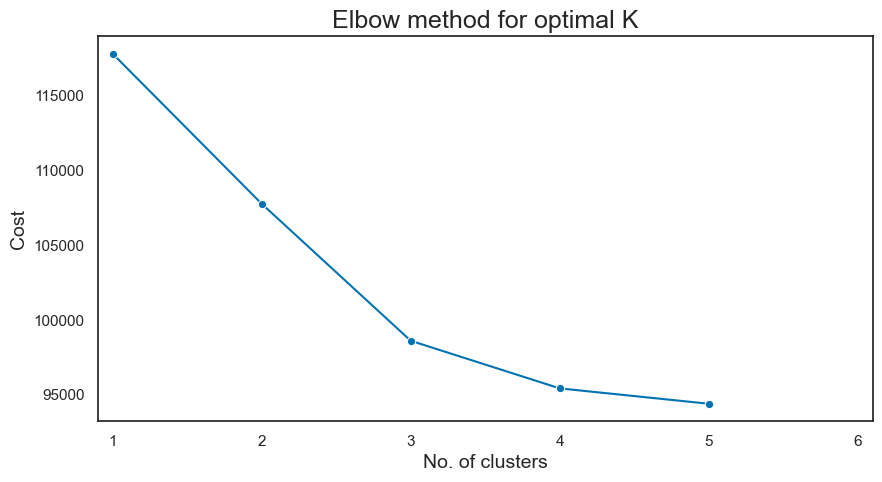

In [32]:
# Plotting the elbow curve to find optimal K

# Function for plotting elbow curve
def plot_elbow_curve(start, end, data):
    K = list(range(1, 6))
    cost = []
    
    for k in K:
        kmodes = KModes(n_clusters = k, init = 'Huang', random_state = 42)
        kmodes.fit_predict(df_km)
        cost.append(kmodes.cost_)
    
    plt.figure(figsize = (10, 5))
    ax = sns.lineplot(x = K, y = cost, marker = 'o', dashes = False)
    ax.set_title('Elbow method for optimal K', fontsize = 18)
    ax.set_xlabel('No. of clusters', fontsize = 14)
    ax.set_ylabel('Cost', fontsize = 14)
    ax.set(xlim = (start-0.1, end+0.1))
    plt.plot();
    
# Plotting the elbow curve
plot_elbow_curve(1, 6, df_km)

In [33]:
# Applying the model with the Huang init

km_huang = KModes(n_clusters = 3, init = 'Huang', verbose = 1, random_state = 42)

clusters_huang = km_huang.fit_predict(df_km)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6969, cost: 98609.0
Run 1, iteration: 2/100, moves: 1639, cost: 98609.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1786, cost: 106440.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4754, cost: 102373.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3783, cost: 104360.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 7443, cost: 99727.0
Run 5, iteration: 2/100, moves: 1917, cost: 99727.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 9245, cost: 100095.0
Run 6, iteration: 2/100, moves: 50, cost: 100095.0
Init: initializing centroids
Init: initializing c

In [34]:
# Applying the model with the Cao init

km_cao = KModes(n_clusters = 3, init = 'Cao', verbose = 1, random_state = 42)

clusters_cao = km_cao.fit_predict(df_km)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3196, cost: 107899.0


In [35]:
# Applying the model with the random init

km_random = KModes(n_clusters = 3, init = 'random', verbose = 1, random_state = 42)

clusters_random = km_random.fit_predict(df_km)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6158, cost: 99310.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 9037, cost: 101644.0
Run 2, iteration: 2/100, moves: 2366, cost: 101644.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6880, cost: 102975.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 5581, cost: 109947.0
Run 4, iteration: 2/100, moves: 2348, cost: 105645.0
Run 4, iteration: 3/100, moves: 2199, cost: 105645.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 7793, cost: 101631.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 12525, cost: 100143.0
Run 6, iteration: 2/100, moves: 3645, cost:

In [36]:
# Printing the cluster centroids, number of iterations and cost

print(km_huang.cluster_centroids_)
print(km_huang.n_iter_)
print(km_huang.cost_)

[['Airplane' 'Yes' '1' 'None' 'No damage' 'California' 'Approach' 'None'
  'Medium' 'No Cloud' 'N' 'No cost' 'No' 'Yes' 'October']
 ['Airplane' 'No' '1' 'None' 'No damage' 'Texas' 'Approach' 'None'
  'Small' 'No Cloud' 'N' 'No cost' 'No' 'No' 'September']
 ['Airplane' 'No' '1' 'None' 'No damage' 'Florida' 'Landing Roll' 'None'
  'Small' 'Some Cloud' 'Y' 'No cost' 'No' 'No' 'July']]
2
98609.0


In [37]:
# Converting clusters arrays into a dataframe

# Adding the clusters to the dataframe
df_km['Cluster labels'] = km_huang.labels_
df_km['Segment'] = df_km['Cluster labels'].map({0:'First', 1:'Second', 2:'Third'})

# Ordering the clusters
df_km['Segment'] = df_km['Segment'].astype('category')
df_km['Segment'] = df_km['Segment'].cat.reorder_categories(['First', 'Second', 'Third'])

# Creating columns for centroids
list_col = ['Cluster labels', 'Segment']
cols = [col for col in df_km if col not in list_col]

# Creating an index for cluster interpretation
index = ['First cluster', 'Second cluster', 'Third cluster']

# Creating the dataframe
df_km_clusters = pd.DataFrame(km_huang.cluster_centroids_, columns = cols, index = index)
df_km_clusters

,Aircraft: Type,Is altitude bin > 1000 ft?,Wildlife: Number struck,Effect: Impact to flight,Effect: Indicated Damage,Origin State,When: Phase of flight,Conditions: Precipitation,Wildlife: Size,Conditions: Sky,Pilot warned of birds or wildlife?,Cost: Total $,Were people injured?,Is Aircraft Large?,Month
First cluster,Airplane,Yes,1,None,No damage,California,Approach,None,Medium,No Cloud,N,No cost,No,Yes,October
Second cluster,Airplane,No,1,None,No damage,Texas,Approach,None,Small,No Cloud,N,No cost,No,No,September
Third cluster,Airplane,No,1,None,No damage,Florida,Landing Roll,None,Small,Some Cloud,Y,No cost,No,No,July


In [38]:
# Counting the number of instances in each cluster

df_km['Cluster labels'].value_counts()

1    12442
2     7142
0     5974
Name: Cluster labels, dtype: int64

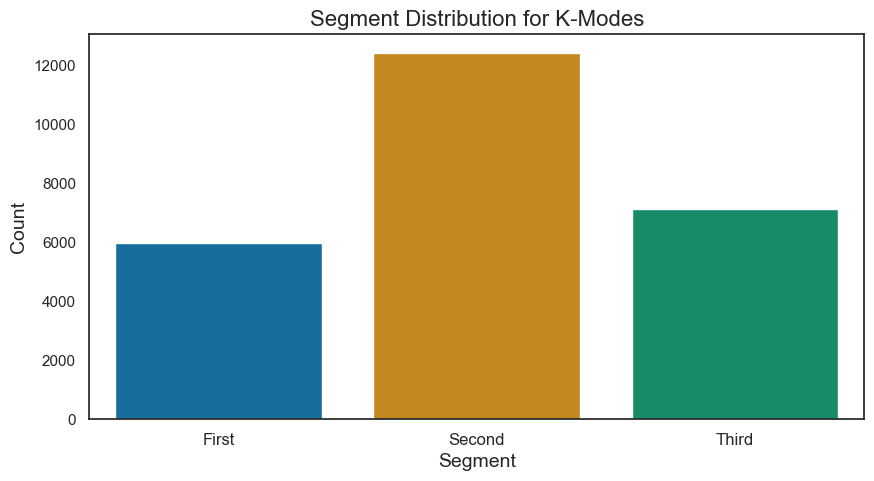

In [39]:
# Plotting the segment distribution

plt.figure(figsize = (10, 5))
plt.xticks(fontsize = 12)

sns.countplot(x = 'Segment', data = df_km)

plt.title('Segment Distribution for K-Modes', fontdict = {'fontsize': 16})
plt.xlabel('Segment', fontsize = 14)
plt.ylabel('Count', fontsize = 14);

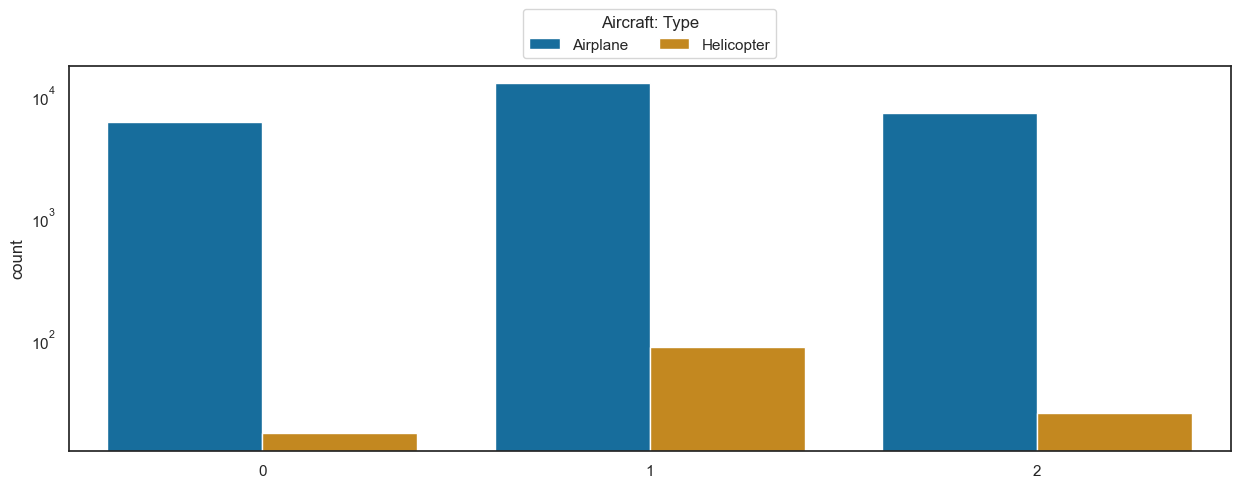

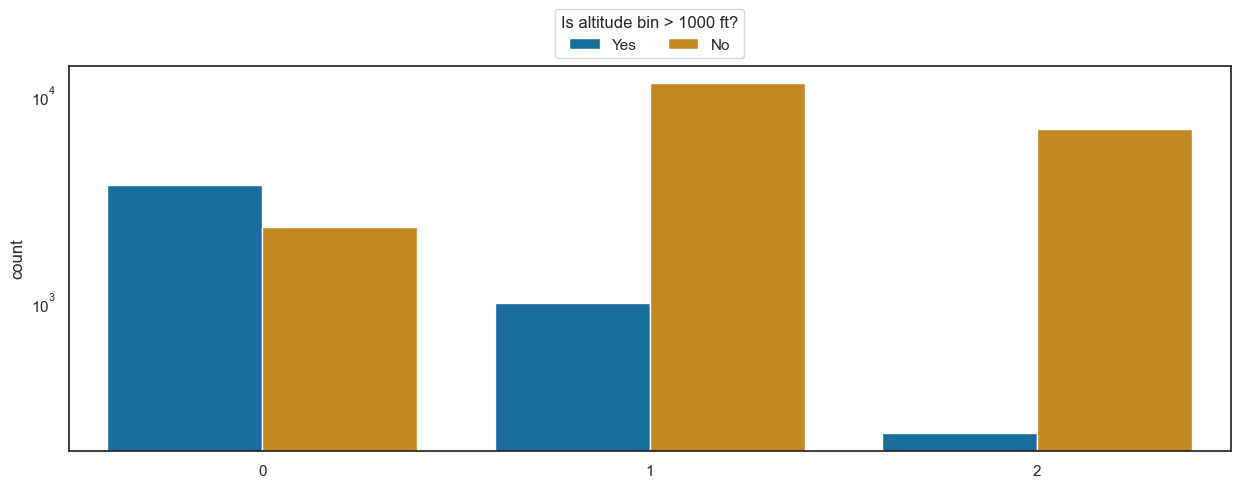

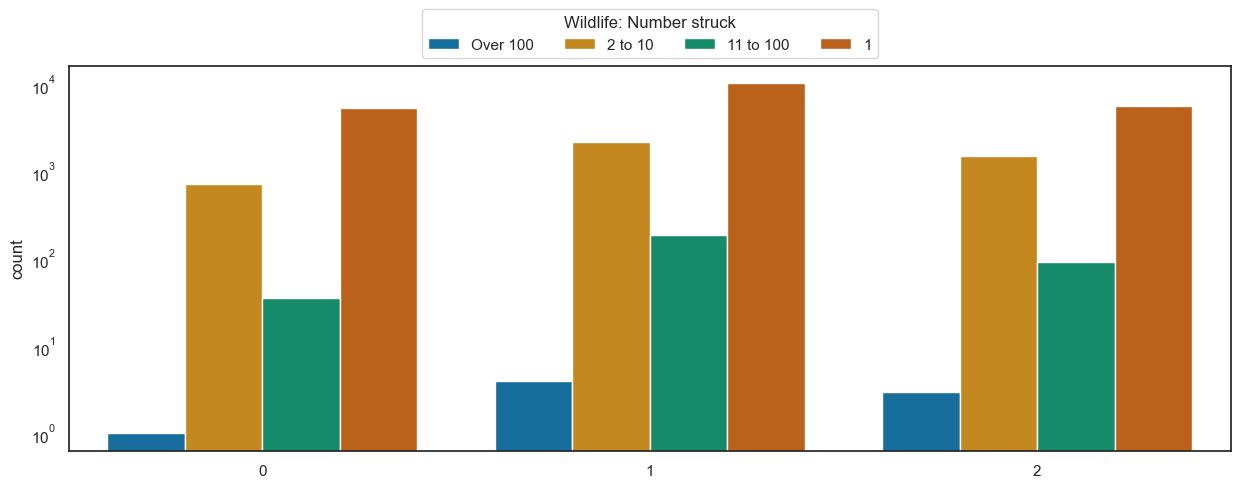

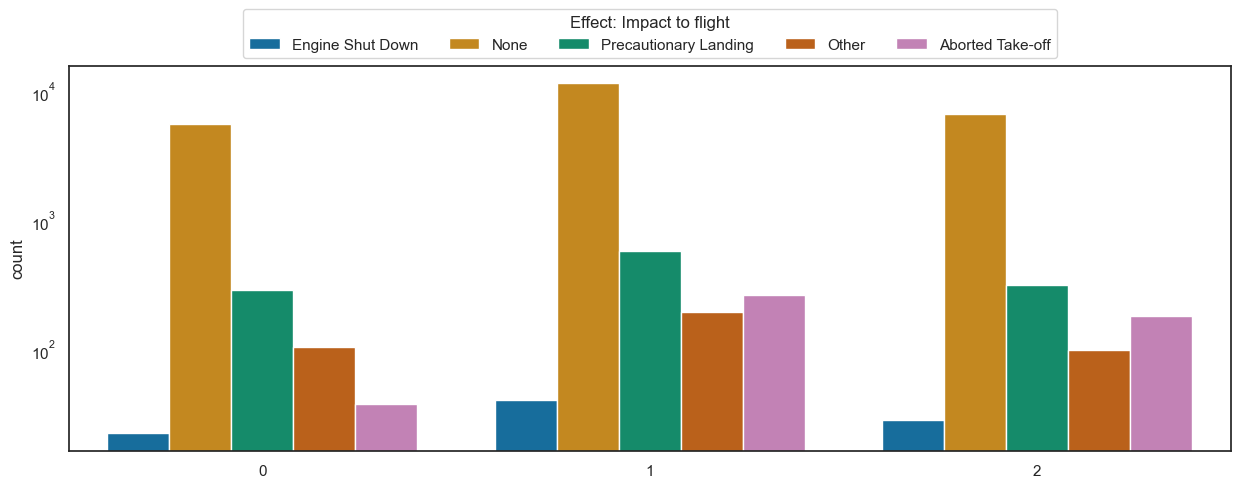

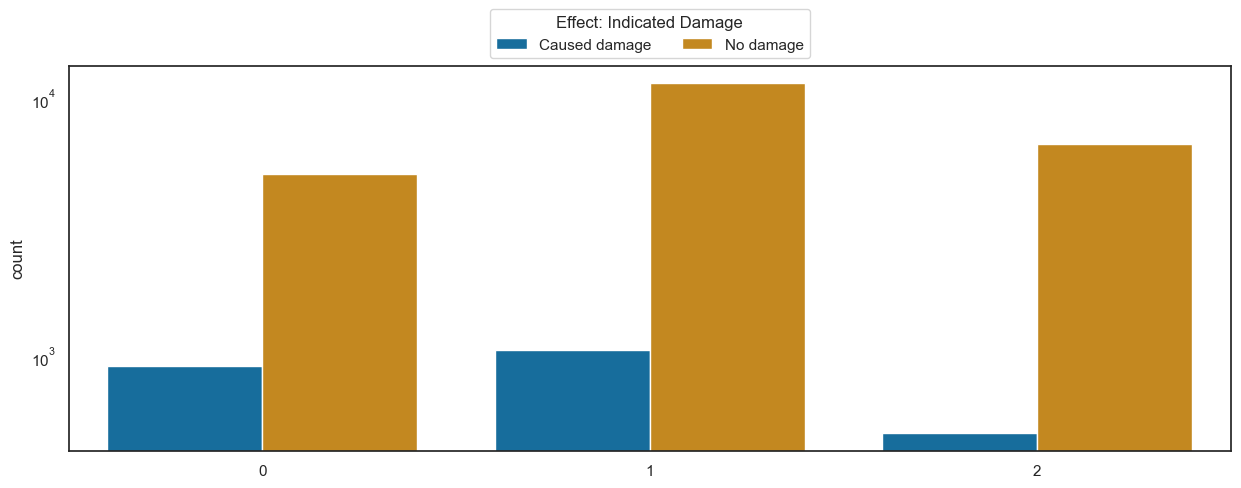

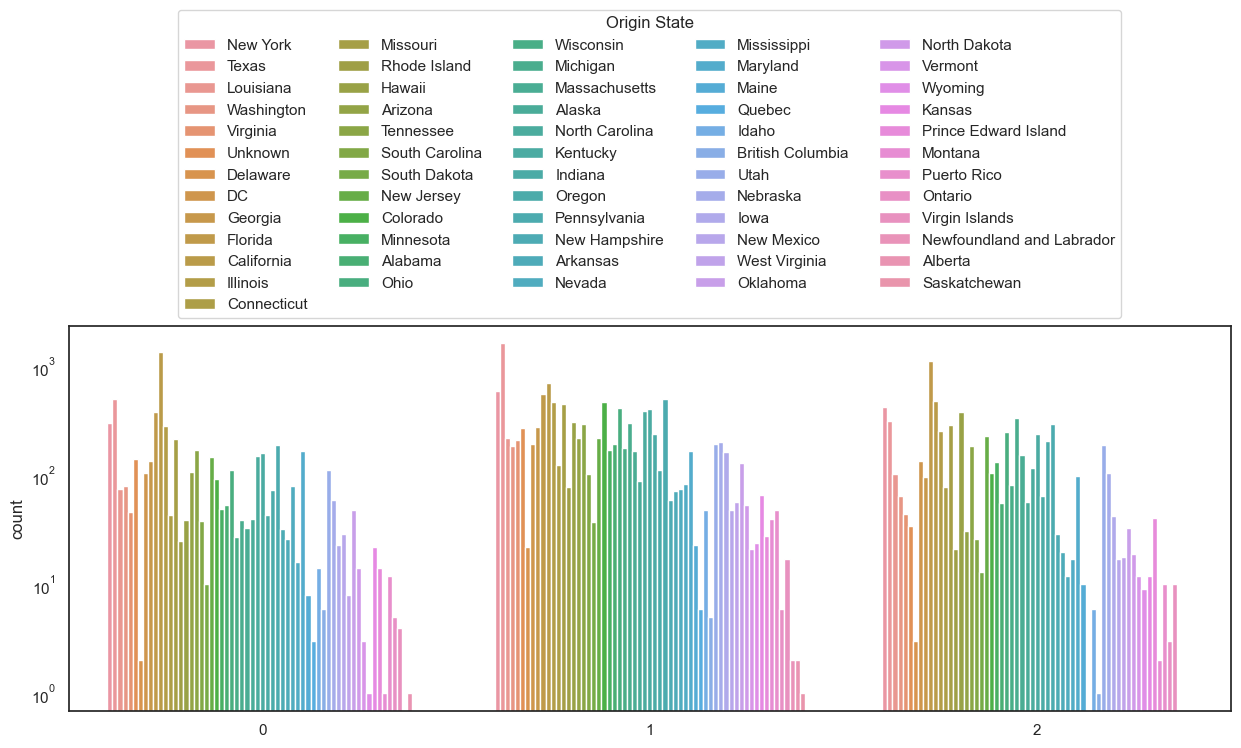

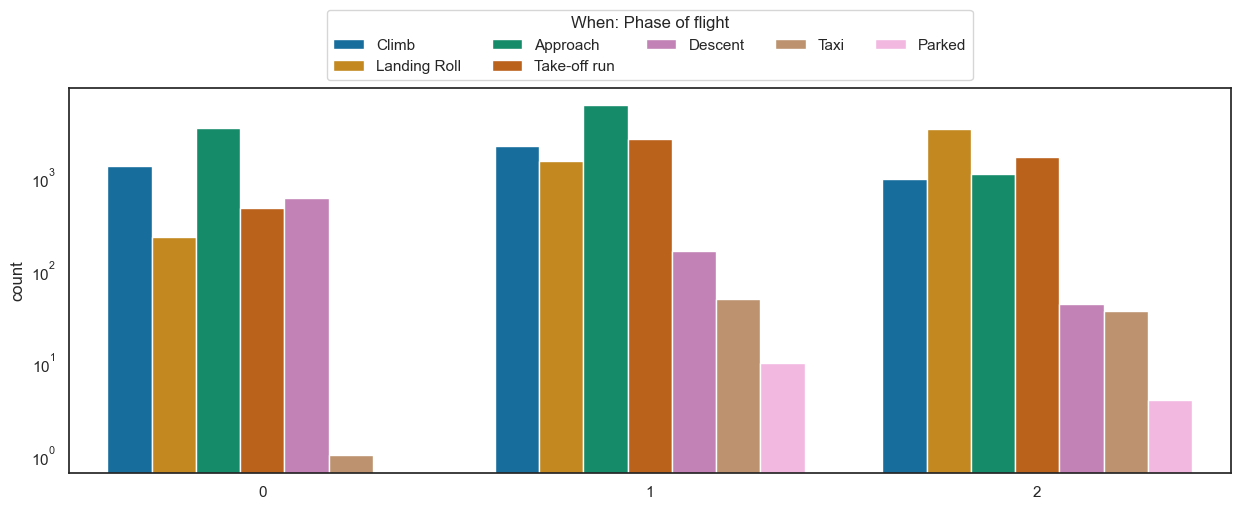

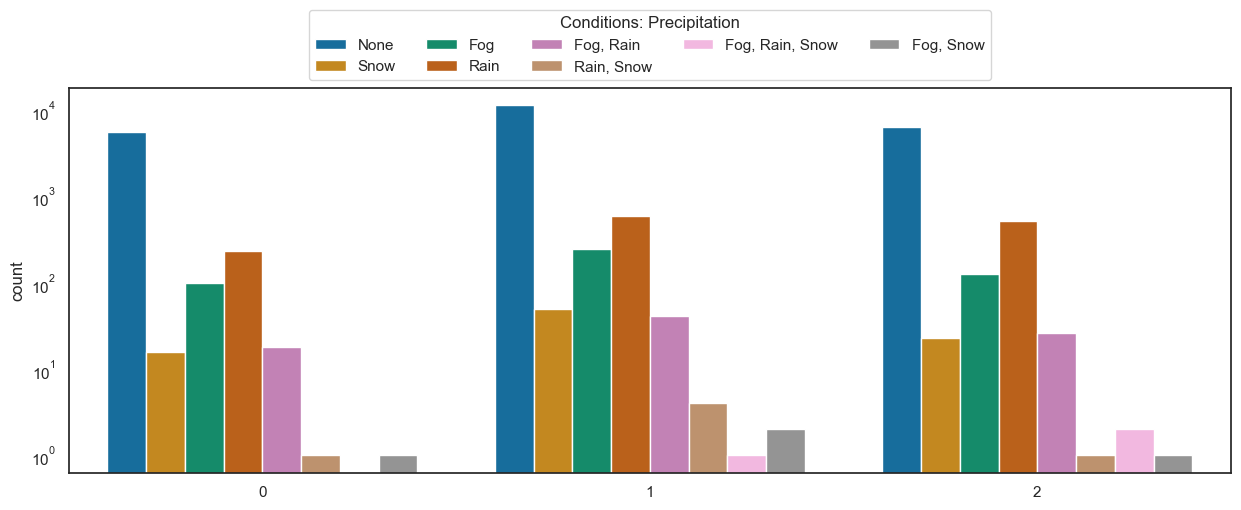

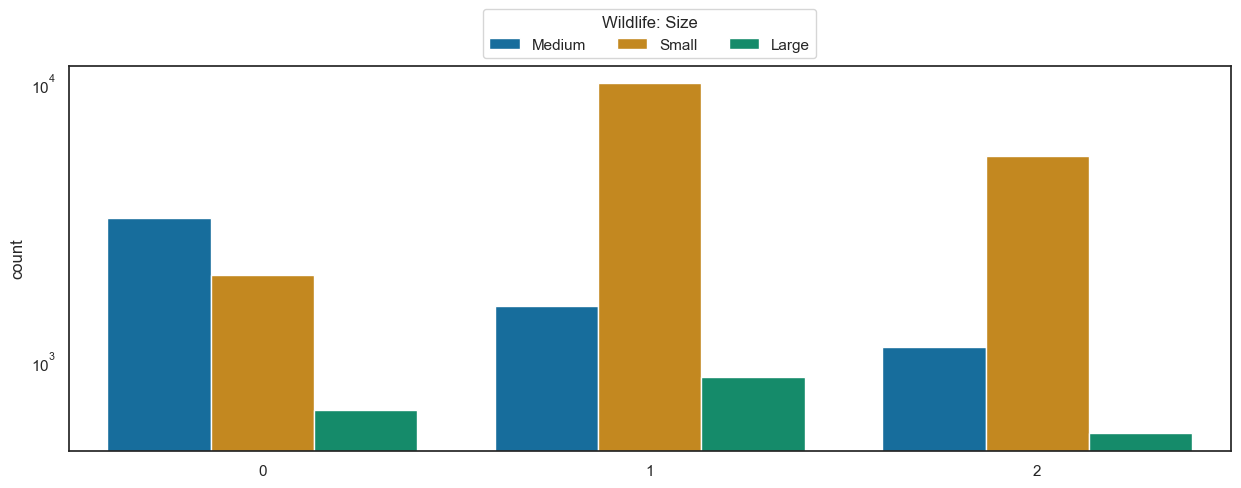

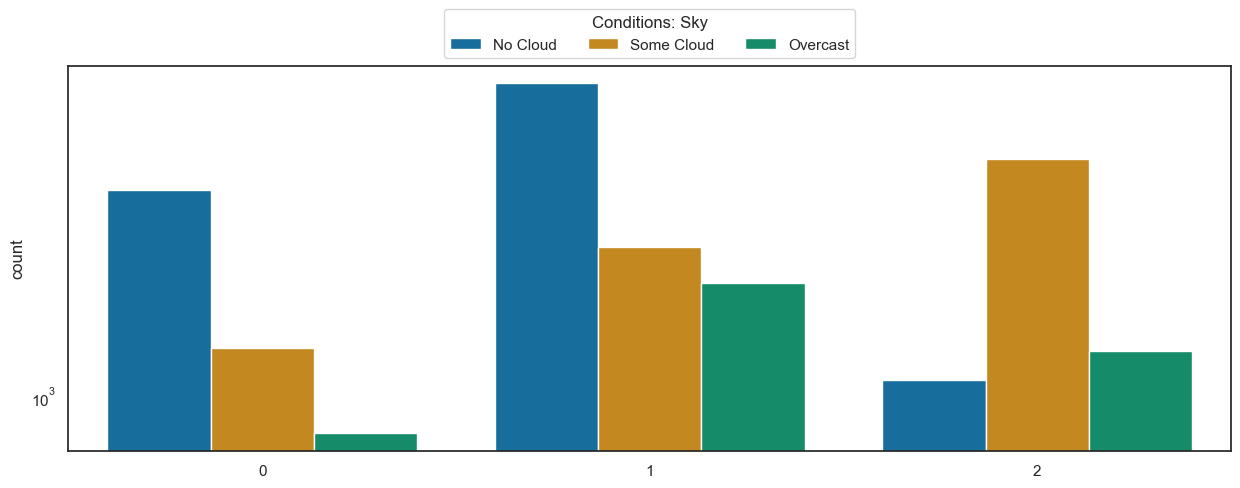

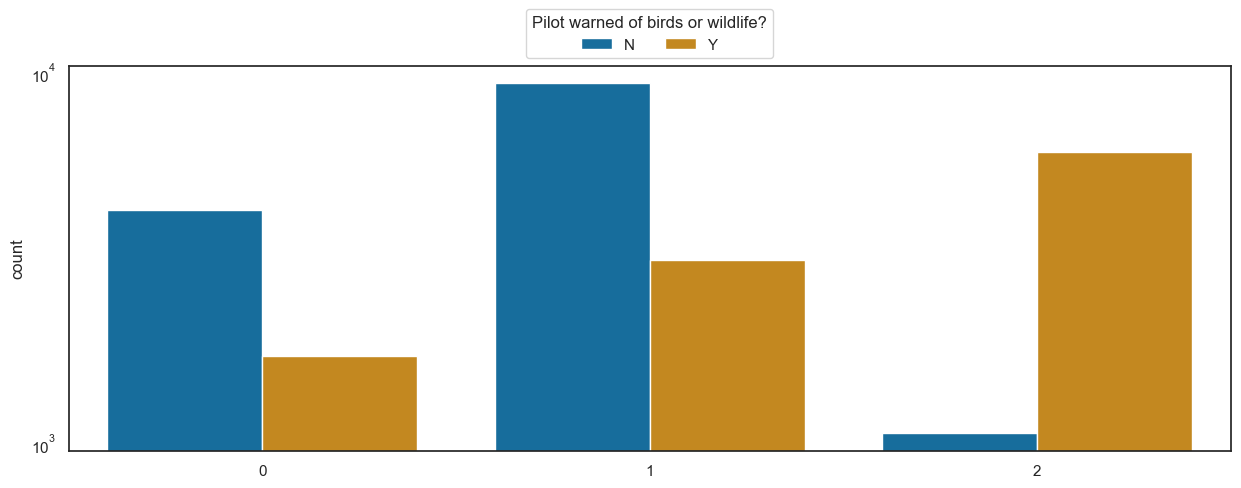

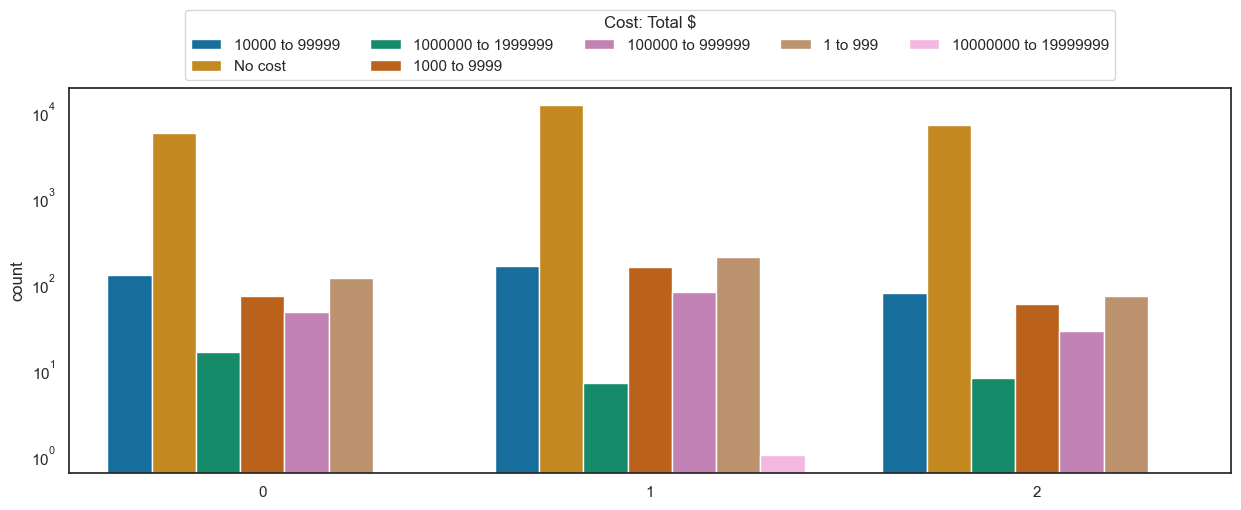

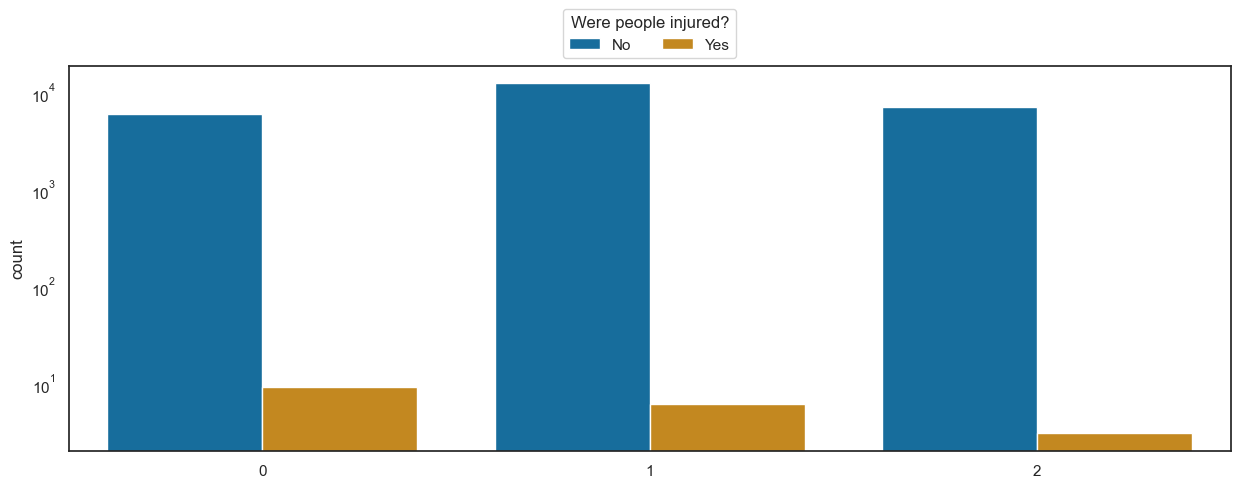

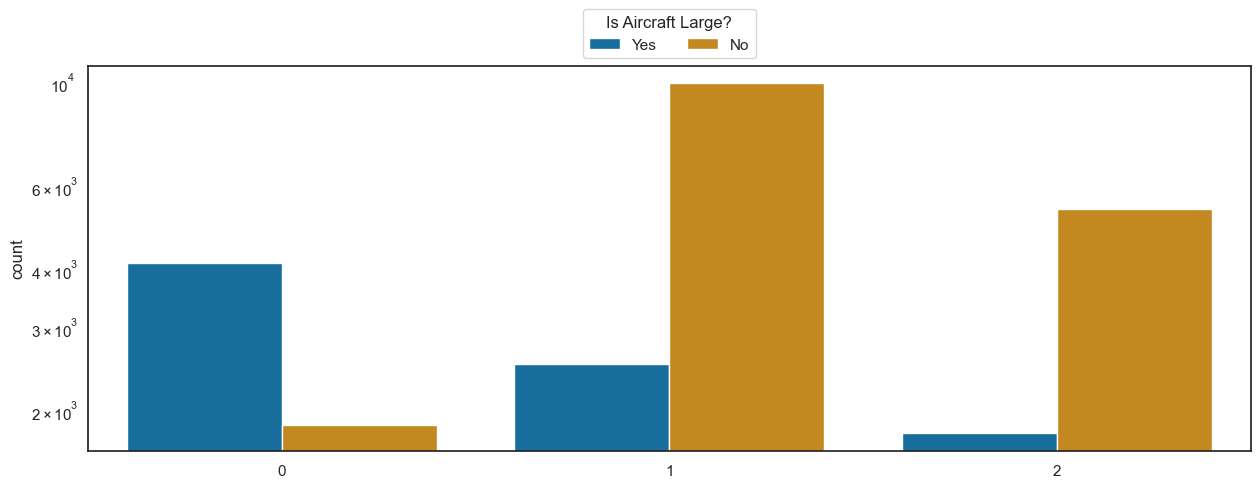

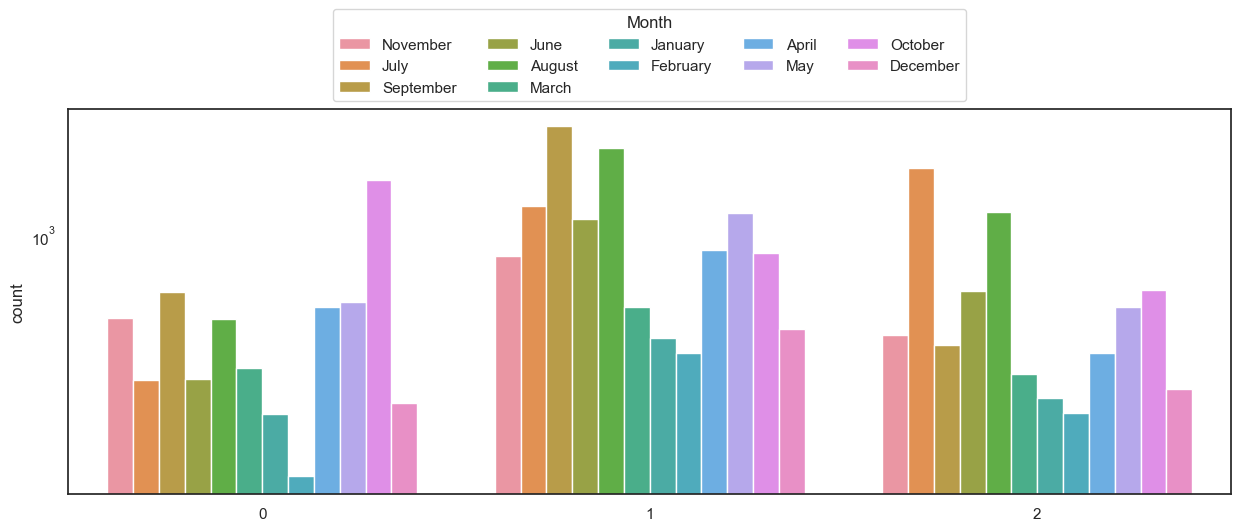

In [40]:
# Plotting the distribution of the features per cluster

for col in df_km.drop(['Cluster labels', 'Segment'], axis = 1):
    
    fig, ax = plt.subplots(figsize = (15, 5))
    ax.set_yscale('log')
    sns.countplot(x = clusters_huang, hue = col, data = df_km)
    sns.move_legend(ax, 'lower center',  bbox_to_anchor = (.5, 1), ncol = 5);

In [41]:
# Defining jaccard similarity to compare pairs of clusters and all clusters

def jaccard_similarity(a, b):
    # Converting list to set
    a = set(a)
    b = set(b)
    # Calculating jaccard similarity
    j = '{:.2f}'.format(float(len(a.intersection(b))) / len(a.union(b)))
    return j

def jaccard_similarity_overall(a, b, c):
    # Converting list to set
    a = set(a)
    b = set(b)
    c = set(c)
    # Calculating jaccard similarity
    j = '{:.2f}'.format(float(len(a.intersection(b, c))) / len(a.union(b, c)))
    return j

In [42]:
# Checking the similarity between each pair of clusters

print('The jaccard similarity between the 1st and the 2nd clusters is: ' + str(
    jaccard_similarity(df_km_clusters.iloc[0], df_km_clusters.iloc[1])) + '.')

print('The jaccard similarity between the 1st and the 3rd clusters is: ' + str(
    jaccard_similarity(df_km_clusters.iloc[0], df_km_clusters.iloc[2])) + '.')

print('The jaccard similarity between the 2nd and the 3rd clusters is: ' + str(
    jaccard_similarity(df_km_clusters.iloc[1], df_km_clusters.iloc[2])) + '.')

The jaccard similarity between the 1st and the 2nd clusters is: 0.56.
The jaccard similarity between the 1st and the 3rd clusters is: 0.32.
The jaccard similarity between the 2nd and the 3rd clusters is: 0.41.


In [43]:
# Checking the overall similarity between all 3 clusters

print('The overall jaccard similarity between the three cluster is: ' + str(
    jaccard_similarity_overall(df_km_clusters.iloc[0], df_km_clusters.iloc[1], df_km_clusters.iloc[2])) + '.')

The overall jaccard similarity between the three cluster is: 0.29.
